# Olin's Coffee Cooling Problem #
#### By: Theo Johnson and Mary Fung

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Background
   Picture this, it's a Thursday evening and ModSim is just wrapping up. Before you leave, your teacher announces that the next class will start in the Nord where the teaching team will spend an hour introducing the next topic. By now, it's not uncommon for any of the first-year courses, such as DesNat or ModSim, to meet in the Nord heading to the AC for time in the studios. If only it weren't so cold in the Nord.

   Last time this happened, you were already tired and low on energy when you got to the AC. Fortunately, you had made some coffee before heading to class. Unfortunately, the colder air in the Nord and the frigid weather outside have cooled your coffee more than you expected. This time however, you're more prepared.

## Question ##
   How warm should you make your coffee, knowing that you aren't going to drink it until you get to the AC and that you'll be in the Nord for an hour beforehand, and instead of making your coffee hotter, could you change the *r* value to get the same results?

## Method ##
Using the coffee cooling model in the Chapter 15 and 16 notebooks, we created our initial model with a set initial coffee temperature of 90 degrees Celcius, we'll sweep the initial temperature once we have a working model.

### Creating a Model ###
First things first, let's make our system.

Our system parameters include the initial temperature, the volume of coffee (in mL), the *r* value (for now let's assume 0.01), the environment temperatures (here's where it gets complicated), the ending time (in minutes), and the time step size (also in minutes).

Now, we also have to set the different temperatures for different times. Assuming you leave the Dining Hall 3 minutes after making your coffee, walk outside for 1 minute before arriving in the Nord, stay in the Nord for an hour, walk outside for 3 minutes to the AC, and take 5 minutes to settle down before drinking your coffee, the code looks like the following.

In [5]:
init = State(T=90)
coffee = System(init=init,
                volume=300,
                r=0.01,
                t_end=72,
                dt=1)

,values
init,T 90 dtype: int64
volume,300
r,0.01
t_end,72
dt,1


In [8]:
T_env = TimeSeries()
# T_env changes based on the location which corresponds to time
for t in range(0,3):
    T_env[t]=T_DH=(73-32) * 5/9

for t in range(3,4):
    T_env[t]=T_Outside=(53-32) * 5/9

for t in range(4,64):
    T_env[t]=T_Nord=(68-32) * 5/9

for t in range(64,67):
    T_env[t]=T_Outside=(53-32) * 5/9

for t in range(67,72):
    T_env[t]=T_AC=(70-32) * 5/9
T_env

,values
0,22.777778
1,22.777778
2,22.777778
3,11.666667
4,20.000000
5,20.000000
6,20.000000
7,20.000000
8,20.000000
9,20.000000


Newton's Law of Cooling represents the differential equation of our stock-and-flow diagram, we'll store that in our update function.

In [14]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp in Celcius)
    t: time in minutes
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    
    T = state.T
    T += -r * (T - T_env[t]) * dt
    
    return State(T=T)

Let's see if it works:

In [15]:
update_func(init, 0, coffee)

,values
T,89.327778


Now our run simulation function:

In [16]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame

To put it all together:

In [17]:
results = run_simulation(coffee, update_func)

,T
0,90
1,89.3278
2,88.6623
3,88.0034
4,87.2401
5,86.5677
6,85.902
7,85.243
8,84.5905
9,83.9446


As a graph, it's easier to see the change in temperature that occurs.

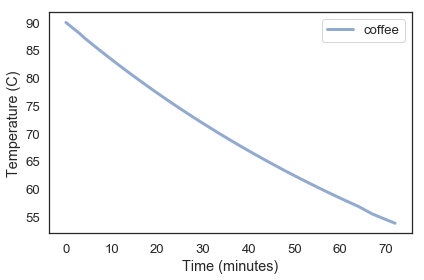

In [18]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

From here, we can collect the final temperature of the coffee.

In [15]:
coffee.T_final

54.52162772999793

## Results 1 ##
This is the skeleton of our model. As shown in the graph, the temperature of the coffee continuously decreases, nearing the temperature of the environment. It should be noted that no largely noticeable difference in the temperature drop based on the change in location can be seen. This is likely due to the fact that the temperature of the coffee is much greater than the surrounding environment, any change in rate is hard to see compared to the overall decrease in temperature.

However, as it stands, the final temperature of our coffee, is 54 degrees Celsius (129.2 degrees Fahrenheit). This is not quite as warm as we would like, so we will be attempting to raise the final temperature by changing both `T_init` and `k`.

### Cleaning up the code ###
Before we can move on, we should clean up our code. This will make it easier moving forward. To do this, we used a make system function to store our parameters.

In [16]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
    
    # T_final is used to store the final temperature.
    # Before the simulation runs, T_final = T_init
    T_final = T_init

    # T_env changes based on the location which corresponds to time
    for t in range(0,3):
        T_env=T_DH=(73-32) * 5/9

    for t in range(3,4):
        T_env=T_Outside=(53-32) * 5/9
    
    for t in range(4,64):
        T_env=T_Nord=(68-32) * 5/9
    
    for t in range(64,67):
        T_env=T_Outside=(53-32) * 5/9
    
    for t in range(67,72):
        T_env=T_AC=(70-32) * 5/9
    
    dt = 1
                
    return System(locals())

Running the new code:

In [17]:
coffee = make_system(T_init=90, r=0.01, volume=300, t_end=72)
results = run_simulation(coffee, update_func)
coffee.T_final

54.52162772999793

And again as a graph:

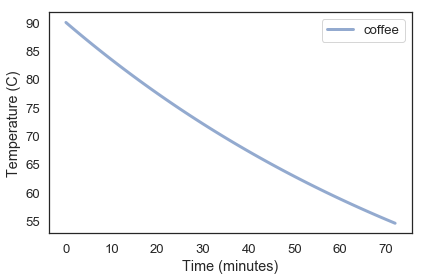

In [18]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

### Finding *r* ###
The heat transfer rate 'r' can be changed based on the insulation that the coffee mug has. By running an error function, we can see what value of 'r' we would need if by the end of our simulation we wanted our coffee to be at a certain temperature, let's say 60 degrees Celcius (or 140 degrees Fahrenheit).

In [20]:
def error_func1(r):
    """Runs a simulation and returns the `error`.
    
    r: heat transfer rate, in 1/min
    
    returns: difference between final temp and 70 C
    """
    
    system = coffee = make_system(T_init=90, r=r, volume=300, t_end=72)
    results = run_simulation(system, update_func)
    return system.T_final - 60

In [21]:
solution = fsolve(error_func1, 0.01)
r_coffee = solution[0]
r_coffee

0.007910026498625787

In [22]:
coffee = coffee = make_system(T_init=90, r=r_coffee, volume=300, t_end=72)
results = run_simulation(coffee, update_func)
coffee.T_final

59.99999999999979

With an initial temperature of 90 degrees Celcius, it will take an *r* value of about 0.008 to end with a final temperature of 60 degrees Celcius.

### Sweeping parameters: T_init ###
So, now that we have a model, let's see how hot our initial coffee temperature should be if we can't change the insulation, or our 'r' value.

First, we'll need a place to store our final temperature:

In [23]:
def coffee_final(results):
 
    return get_last_value(results.T)

Now we can sweep our first parameter, our initial temperature, by making a range of values for T_init with constant *r*:

In [24]:
T_array = linspace(60,100,9)
r = 0.01

0.01

In [25]:
    for T_init in T_array:
        coffee = make_system(T_init, r, volume, t_end)
        results = run_simulation(coffee, update_func)
        print(coffee.T_init, coffee_final(results))

60.0 39.97188662177302
65.0 42.396843473143846
70.0 44.82180032451464
75.0 47.246757175885435
80.0 49.67171402725624
85.0 52.09667087862711
90.0 54.52162772999793
95.0 56.9465845813687
100.0 59.37154143273953


Now we can loop the array into a function and return a SweepSeries object.

In [26]:
def sweep_T(T_array, r):
    """Sweep a range of values for T_init.
    
    temp_array: array of T_init values
    r: rate of heat transfer
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for T_init in T_array:
        coffee = make_system(T_init, r, volume, t_end)
        results = run_simulation(coffee, update_func)
        sweep[coffee.T_init] = coffee_final(results)
    return sweep

Let's run the function and plot the results.

In [27]:
init_Temp = sweep_T(T_array, r)

,values
60,39.971887
65,42.396843
70,44.821800
75,47.246757
80,49.671714
85,52.096671
90,54.521628
95,56.946585
100,59.371541


Saving figure to file figs/Project2-1.pdf


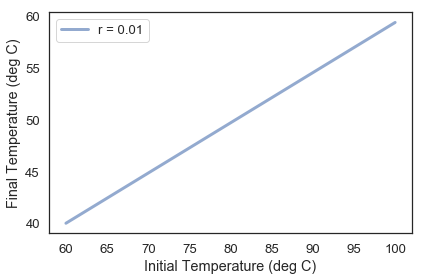

In [28]:
label = 'r = ' + str(r)
plot(init_Temp, label=label)

decorate(xlabel='Initial Temperature (deg C)',
         ylabel='Final Temperature (deg C)')

savefig('figs/Project2-1.pdf')

## Results 2 ##
As expected, changing the initial temperature causes a change in the final temperature of the coffee. Since people generally prefer to drink coffee around 49-60 degrees Celcius (120-140 degrees Fahrenheit) the initial temperature for our coffee would have to be between 80 and 100 degrees Celcius (176-212 degrees Fahrenheit). However, the higher initial temperatures could be potentially dangerous, and we should look at other ways to produce high final temperatures that are safer.

### Sweeping parameters: *r* ###
Using the array we created for T_init, we can create an array for values of *r* using the value that we calculated earlier as a guide. By changing the rate of heat transfer, we can also attempt to end our simulation with a better final temperature.

In [30]:
T_array

array([ 60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [32]:
r_array = [0, 0.002, 0.004, 0.006, 0.008, 0.01]

[0, 0.002, 0.004, 0.006, 0.008, 0.01]

For each value of *r*, we can sweep T_init and plot the results.

Saving figure to file figs/Project2-2.pdf


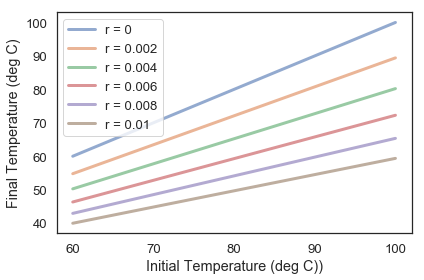

In [33]:
for r in r_array:
    init_Temp = sweep_T(T_array, r)
    label = 'r = ' + str(r)
    plot(init_Temp, label=label)
    
decorate(xlabel='Initial Temperature (deg C))',
         ylabel='Final Temperature (deg C)',
         loc='upper left')

savefig('figs/Project2-2.pdf')

Here we can see that we have a few more options. By changing the rate of heat transfer, by altering the insulation of the coffee cup, we can change the final temperature. Having a lower rate of heat transfer (more/better insulation) will lower the necessary initial temperature, making it less likely that we'll burn ourselves as we carry our coffee around Olin.

### Sweeping parameters: Combined ###
Now that that's done, let's combine the previous parameter sweeps into one SweepFrame.

In [34]:
def sweep_parameters(T_array, r_array):
    """Sweep a range of values for T_init and r.
    
    T_array: array of initial temperatures
    r_array: array of heat transfer rates
    
    returns: SweepFrame with one row for each T_init
             and one column for each r
    """
    frame = SweepFrame(columns=r_array)
    for r in r_array:
        frame[r] = sweep_T(T_array, r)
    return frame

And the results:

In [35]:
T_array = linspace(60, 100, 9)
gamma_array = linspace(0, 0.01, 6)
frame = sweep_parameters(T_array, r_array)
frame.head()

,0.0,0.002,0.004,0.006,0.008,0.01
60,60.0,54.779668,50.251672,46.325312,42.921627,39.971887
65,65.0,59.108483,53.998315,49.567138,45.725836,42.396843
70,70.0,63.437297,57.744959,52.808964,48.530045,44.821800
75,75.0,67.766112,61.491602,56.050790,51.334254,47.246757
80,80.0,72.094926,65.238246,59.292616,54.138463,49.671714


And to plot the results:

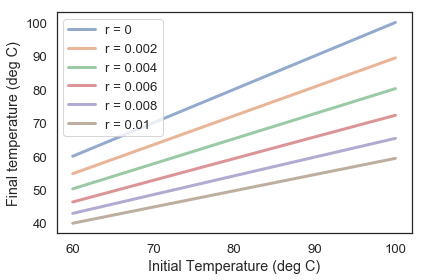

In [36]:
for r in r_array:
    label = 'r = ' + str(r)
    plot(frame[r], label=label)
    
decorate(xlabel='Initial Temperature (deg C)',
         ylabel='Final temperature (deg C)',
         loc='upper left')

## Results 3##
Changing the rate of heat transfer has a huge impact on the final temperature, especially when used alongside different starting temperatures. Based on these results, we can see that lower *r* values have better effects on the final temperature of the coffee. Looking at the results, values of 0.02 and lower can, at different initial temperatures result in final coffee temperatures that are more suitable for drinking.

## Interpretation ##
The temperature range that is suggested to be best for drinking coffee lies between 49 and 60 degrees Celsius (around 120 to 140 F), depending on each person's personal preference. The recommended serving temperature for coffee is between 70 and 85 degrees Celsius (around 160 to 185 F).

To meet this requirement with a coffee cup with a k value of 0.01, which was our original *r* value, the initial temperature has to be almost 100 degrees Celsius which is the boiling temperature of water. Not only is this unfeasible, but coffee that hot would be dangerous to carry around since it would be very easy to burn oneself.

Comparatively, having a cup with a k value of 0.01 allows for an initial temperature of 80 C or higher and produces a final temperature between 50 C and 60 C.

No model is perfect, and ours certainly had a fair amount of failings.

First of all, we had hoped to see a change in the cooling of the coffee based on the change in location. While a difference does exist, it is barely noticeable and all we can see is a general decrease in temperature over time. This short falling was able to be ignored in the larger scheme of things, since our question depended more on the eventual final temperature of the coffee after a significant decrease in temperature had occurred.

Another alteration we had to make to the model occurred when we began sweeping parameters. Originally, we had intended to only sweep for the initial temperature. This proved to be too simple of a model and didn't allow for the question to be answered based on the *r* value we originally had as a constant. To solve this, we added a second parameter sweep.

Throughout the project, iteration played an important role in our modeling process. We used a few different ways of writing the code, using some later iterations to condense it in a neater and less unwieldy form. We also used different iterations of our code to choose the best ranges for sweeping the initial temperature and *r* values so that the model wasn't cluttered with too much data and made sense.

## Abstract ##
In this project, we asked how warm should you make your coffee, knowing that you aren't going to drink it until you get to the AC and that you'll be in the Nord for an hour beforehand, and instead of making your coffee hotter, could you change the *r* value to get the same results?

We found that with an initial temperature of 90 degrees Celsius and an *r* value of 0.01, the coffee was too cold to drink after the set time period. The following graph shows the original loss in temperature before sweeping any parameters.

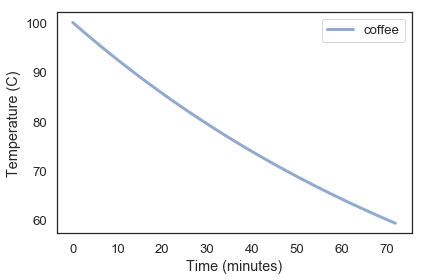

In [37]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

When we swept the initial temperature, we found that the highest possible initial temperatures (100 C) didn't produce final temperatures that were warm enough. At an initial temperature of 100 C (boiling point of water) the final temperature is just over 29 C as shown in the graph below.

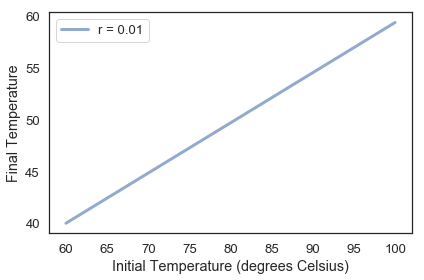

In [39]:
label = 'r = ' + str(r)
plot(init_Temp, label=label)

decorate(xlabel='Initial Temperature (degrees Celsius)',
         ylabel='Final Temperature')

Our final parameter sweep, which swept both initial temperature and k value better answered our question. The following graph indicates our results.

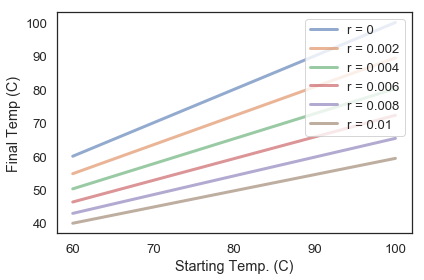

In [40]:
for r in r_array:
    label = 'r = ' + str(r)
    plot(frame[r], label=label)
    
decorate(xlabel='Starting Temp. (C)',
         ylabel='Final Temp (C)',
         loc=1)

As shown, to have a final coffee temperature that is warm enough to drink, a k value of 0.01 or less would be needed along with an initial temperature of at least 80 degrees Celsius.